In [13]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Budget Sensitivity

In [14]:
df_mont = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv")
df_mont = pd.concat([df_mont, pd.read_csv(PROJECT_ROOT / "output" / "run_YSarn" / "results.csv")])
df_cville = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv")
df_cville = pd.concat([df_cville, pd.read_csv(PROJECT_ROOT / "output" / "run_nRBkk" / "results.csv")])
df_mont_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_Txksw" / "results.csv")
df_mont_edges = pd.concat([df_mont_edges, pd.read_csv(PROJECT_ROOT / "output" / "run_4AUu7" / "results.csv")])
df_cville_edges = pd.read_csv(PROJECT_ROOT / "output" / "run_X9z7Y" / "results.csv")
df_cville_edges = pd.concat([df_cville_edges, pd.read_csv(PROJECT_ROOT / "output" / "run_T9eDX" / "results.csv")])

df_mont_none = pd.read_csv(PROJECT_ROOT / "output" / "run_k3mHM" / "results.csv")
df_cville_none = pd.read_csv(PROJECT_ROOT / "output" / "run_RFUC4" / "results.csv")
df_mont_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_4f9WP" / "results.csv")
df_cville_extra_none = pd.read_csv(PROJECT_ROOT / "output" / "run_GCQvG" / "results.csv")

df = pd.concat([df_mont, df_mont_none, df_cville, df_cville_none, df_mont_edges, df_mont_extra_none,
               df_cville_edges, df_cville_extra_none])

df = df.replace({ 'DegGreedy_fair':'DegGreedy', 'DepRound_fair':'DepRound', 'segmented_greedy': 'SegDegree',
                 'Random':'Random Sol', 'NoIntervention':'None'})
df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "DegGreedy"], df[df["Alg for MinExposed"] == "DepRound"],
                 df[df["Alg for MinExposed"] == "SegDegree"], df[df["Alg for MinExposed"] == "Random Sol"],
               df[df["Alg for MinExposed"] == "None"]])

df_mont = df[df["G"] == "montgomery"]
df_cville = df[df["G"] == "cville"]
df_mont_edges = df[df["G"] == "montgomery_extra"]
df_cville_edges = df[df["G"] == "cville_extra"]

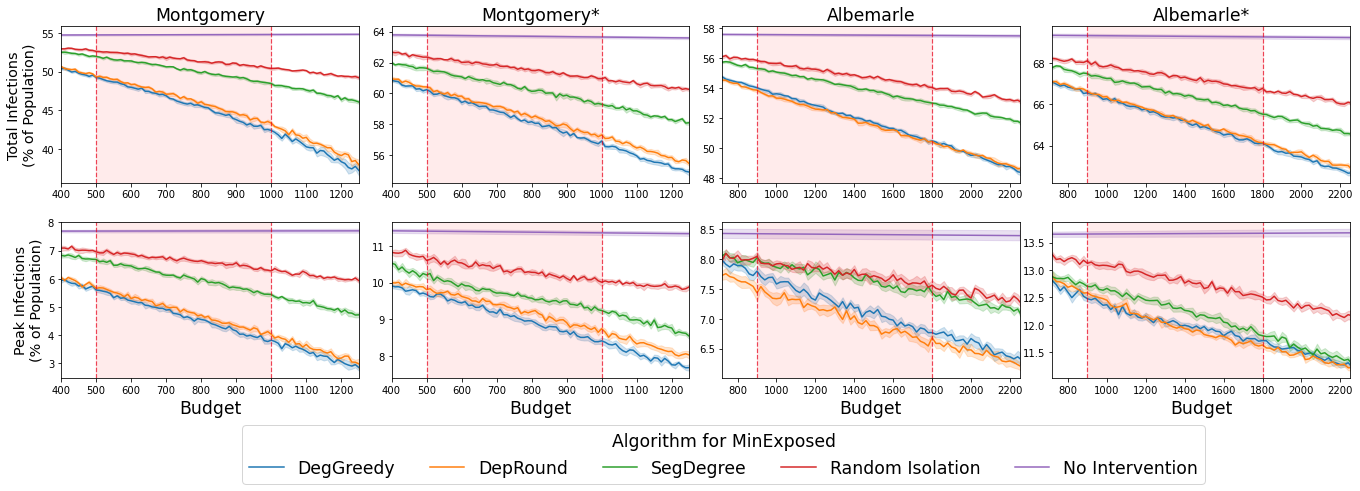

In [16]:
fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections\n(% of Population)", fontsize='x-large')
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_cville, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 2])
ax1.get_legend().remove()
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 2].set_xlim(720, 2250)

ax2 = sns.lineplot(data=df_mont_edges, x="budget", y="infected", hue="Alg for MinExposed", ax= ax[0, 1])
ax2.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 1].set_xlim(400,1250)

ax3 = sns.lineplot(data=df_cville_edges, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[0, 3])
ax3.get_legend().remove()
ax[0, 3].set_xlabel("")
ax[0, 3].set_ylabel("")
ax[0, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 3].set_xlim(720, 2250)

ax4 = sns.lineplot(data=df_mont, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 0])
ax4.get_legend().remove()
ax[1, 0].set_xlabel("Budget", fontsize='xx-large')
ax[1, 0].set_ylabel("Peak Infections\n(% of Population)", fontsize='x-large')
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)

ax5 = sns.lineplot(data=df_cville, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 2])
ax5.get_legend().remove()
ax[1, 2].set_xlabel("Budget", fontsize='xx-large')
ax[1, 2].set_ylabel("")
ax[1, 2].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 2].set_xlim(720, 2250)

ax6 = sns.lineplot(data=df_mont_edges, x="budget", y="peak", hue="Alg for MinExposed", ax= ax[1, 1])
ax6.get_legend().remove()
ax[1, 1].set_xlabel("Budget", fontsize='xx-large')
ax[1, 1].set_ylabel("")
ax[1, 1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
#ax[1, 1].text(750, 7.7, 'Status-quo estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
#ax[1, 1].text(830, 7.7, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[1, 1].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 1].set_xlim(400,1250)
#ax[1, 0].set_ylim(50,65)

ax7 = sns.lineplot(data=df_cville_edges, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1, 3])
ax7.get_legend().remove()
ax[1, 3].set_xlabel("Budget", fontsize = "xx-large")
ax[1, 3].set_ylabel("")
ax[1, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 3].set_xlim(720, 2250)

pad = 5

ax0.set_title("Montgomery", fontsize='xx-large')
ax1.set_title("Albemarle", fontsize='xx-large')
ax2.set_title("Montgomery*", fontsize='xx-large')
ax3.set_title("Albemarle*", fontsize='xx-large')

fig.tight_layout()

legend = fig.legend(['DegGreedy','DepRound','SegDegree','Random Isolation', 'No Intervention'],title='Algorithm for MinExposed',loc = "lower center", ncol = 5, 
           bbox_to_anchor = (0.55, -0.15), fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize='xx-large')

plt.subplots_adjust(wspace = 0.11, hspace = 0.25)

fig.set_figwidth(20)

fig.savefig("../output/plots/combined_budget_sensitivity_seg.png", dpi=500, bbox_inches = 'tight')

## Compliance and Snitch Sensitivity

In [18]:
df_mont_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_gU5XV" / "results.csv")
df_mont_comp = pd.concat([df_mont_comp, pd.read_csv(PROJECT_ROOT / "output" / "run_AmHN3" / "results.csv")])
df_cville_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_2ixbp" / "results.csv")
df_cville_comp = pd.concat([df_cville_comp, pd.read_csv(PROJECT_ROOT / "output" / "run_PVvnv" / "results.csv")])
df = pd.concat([df_mont_comp, df_cville_comp])
df["var"] = "Compliance"

df_mont_snitch = pd.read_csv(PROJECT_ROOT/ "output"/ "run_DYCep"/ "results.csv")
df_mont_snitch = pd.concat([df_mont_snitch, pd.read_csv(PROJECT_ROOT/ "output"/ "run_ZRcjV"/ "results.csv"), 
                            pd.read_csv(PROJECT_ROOT/ "output"/ "run_E27oi"/ "results.csv")])
df_cville_snitch = pd.read_csv(PROJECT_ROOT/ "output"/ "run_5jJps"/ "results.csv")
df_cville_snitch = pd.concat([df_cville_snitch, pd.read_csv(PROJECT_ROOT/ "output"/ "run_UjQY9"/ "results.csv")])
df_cville_snitch = pd.concat([df_cville_snitch, pd.read_csv(PROJECT_ROOT/ "output"/ "run_NMSYq"/ "results.csv")])
df2 = pd.concat([df_mont_snitch, df_cville_snitch])
df2["var"] = "Snitch"

df = pd.concat([df, df2])
df = df.replace({'NoIntervention':'None', 'Random':'Random Sol', 'EC':'Eigenvector Centrality', 
            'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy', 'segmented_greedy': 'SegDegree'})

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "DegGreedy"],df[df["Alg for MinExposed"] == "DepRound"],
                df[df["Alg for MinExposed"] == "SegDegree"], df[df["Alg for MinExposed"] == "Random Sol"]])

df_mont_comp = df[(df["var"]=="Compliance")&(df["G"] == "montgomery")]
df_cville_comp = df[(df["var"]=="Compliance")&(df["G"] == "cville")]
df_mont_snitch = df[(df["var"]=="Snitch")&(df["G"] == "montgomery")]
df_cville_snitch = df[(df["var"]=="Snitch")&(df["G"] == "cville")]

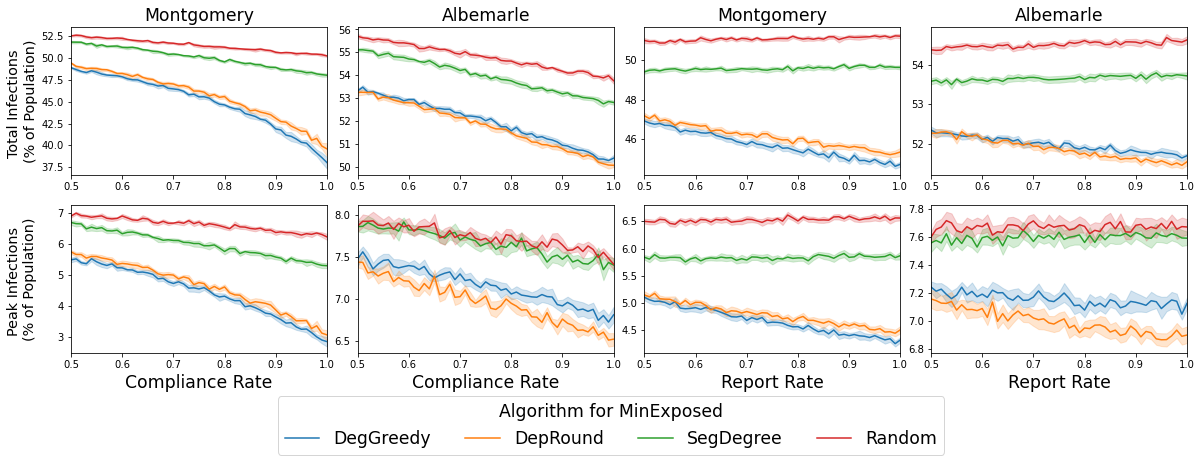

In [19]:
fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont_comp, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)", fontsize = 'x-large')
ax[0, 0].set_xlim(0.5, 1)

ax2 = sns.lineplot(data=df_mont_comp, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 0])
ax2.get_legend().remove()
ax[1, 0].set_xlabel("Compliance Rate",fontsize = 'xx-large')
ax[1, 0].set_ylabel("Peak Infections \n(% of Population)\n", fontsize = 'x-large')
ax[1, 0].set_xlim(0.5, 1)

ax1 = sns.lineplot(data=df_cville_comp, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlim(0.5, 1)

ax4 = sns.lineplot(data=df_cville_comp, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Compliance Rate",fontsize = 'xx-large')
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlim(0.5, 1)

ax5 = sns.lineplot(data = df_mont_snitch, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 2])
ax5.get_legend().remove()
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].set_xlim(0.5, 1)

ax6 = sns.lineplot(data = df_mont_snitch, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 2])
ax6.get_legend().remove()
ax[1, 2].set_xlabel("Report Rate",fontsize = 'xx-large')
ax[1, 2].set_ylabel("")
ax[1, 2].set_xlim(0.5, 1)

ax8 = sns.lineplot(data=df_cville_snitch, x="snitch_rate", y="infected", hue = "Alg for MinExposed", ax=ax[0, 3])
ax8.get_legend().remove()
ax[0, 3].set_xlabel("", fontsize = 'x-large')
ax[0, 3].set_ylabel("", fontsize = 'large')
ax[0, 3].set_xlim(0.5, 1)

ax9 = sns.lineplot(data=df_cville_snitch, x="snitch_rate", y="peak", hue = "Alg for MinExposed", ax=ax[1, 3])
ax9.get_legend().remove()
ax[1, 3].set_xlabel("Report Rate", fontsize = 'xx-large')
ax[1, 3].set_ylabel("", fontsize = 'large')
ax[1, 3].set_xlim(0.5, 1)

ax[0,0].set_title("Montgomery", fontsize = 'xx-large')
ax[0,1].set_title("Albemarle", fontsize = 'xx-large')
ax[0,2].set_title("Montgomery", fontsize = 'xx-large')
ax[0,3].set_title("Albemarle", fontsize = 'xx-large')

legend = fig.legend(['DegGreedy', 'DepRound', 'SegDegree', 'Random'], title='Algorithm for MinExposed', loc="lower center", 
                    ncol = 4, bbox_to_anchor=(0.5, -0.13), fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize = "xx-large")

fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.12, hspace = 0.2)
fig.savefig("../output/plots/combined_compliance_infoloss_sensitivity_seg.png", dpi=500, bbox_inches = 'tight')

plt.show()

In [20]:
df_mont_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_CuHWm" / "results.csv")
df_mont_comp = pd.concat([df_mont_comp[df_mont_comp["compliance_rate"]<64], 
                          pd.read_csv(PROJECT_ROOT / "output" / "run_Ycb3k" / "results.csv")])
df_mont_comp = pd.concat([df_mont_comp, pd.read_csv(PROJECT_ROOT / "output" / "run_9i6ag" / "results.csv")])
df_cville_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_FjbX3" / "results.csv")
df_cville_comp = pd.concat([df_cville_comp, pd.read_csv(PROJECT_ROOT / "output" / "run_fxUow" / "results.csv")])
df = pd.concat([df_mont_comp, df_cville_comp])
df["var"] = "Compliance"

df_cville_snitch = pd.read_csv(PROJECT_ROOT/"output"/"run_VbLQy"/"results.csv")
df_mont_snitch = pd.read_csv(PROJECT_ROOT/"output"/"run_U3JCu"/"results.csv")
df2 = pd.concat([df_mont_snitch, df_cville_snitch])
df2["var"] = "Snitch"

df = pd.concat([df, df2])
df = df.replace({'NoIntervention':'None', 'Random':'Random Sol', 'EC':'Eigenvector Centrality', 
            'DepRound_fair':'DepRound', 'DegGreedy_fair':'DegGreedy', 'segmented_greedy': 'SegDegree'})

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = pd.concat([df[df["Alg for MinExposed"] == "DegGreedy"],df[df["Alg for MinExposed"] == "DepRound"],
                df[df["Alg for MinExposed"] == "SegDegree"], df[df["Alg for MinExposed"] == "Random Sol"]])

df_mont_comp = df[(df["var"]=="Compliance")&(df["G"] == "montgomery_extra")]
df_cville_comp = df[(df["var"]=="Compliance")&(df["G"] == "cville_extra")]
df_mont_snitch = df[(df["var"]=="Snitch")&(df["G"] == "montgomery_extra")]
df_cville_snitch = df[(df["var"]=="Snitch")&(df["G"] == "cville_extra")]


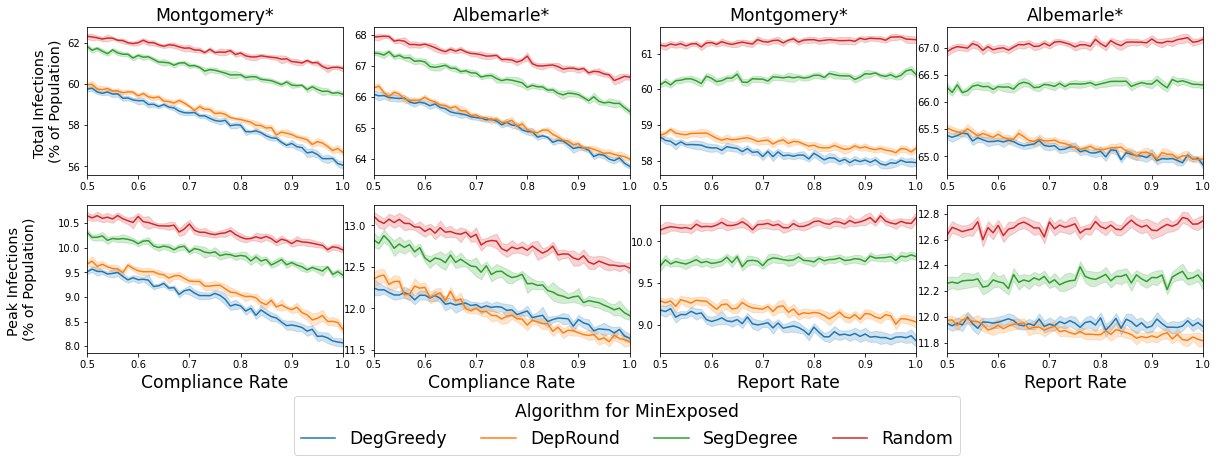

In [21]:
fig, ax = plt.subplots(2,4,figsize=(10,6))

import seaborn as sns

ax0 = sns.lineplot(data=df_mont_comp, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)", fontsize = 'x-large')
ax[0, 0].set_xlim(0.5, 1)

ax2 = sns.lineplot(data=df_mont_comp, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 0])
ax2.get_legend().remove()
ax[1, 0].set_xlabel("Compliance Rate",fontsize = 'xx-large')
ax[1, 0].set_ylabel("Peak Infections \n(% of Population)\n", fontsize = 'x-large')
ax[1, 0].set_xlim(0.5, 1)

ax1 = sns.lineplot(data=df_cville_comp, x="compliance_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 1])
ax1.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlim(0.5, 1)

ax4 = sns.lineplot(data=df_cville_comp, x="compliance_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 1])
ax4.get_legend().remove()
ax[1, 1].set_xlabel("Compliance Rate",fontsize = 'xx-large')
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlim(0.5, 1)

ax5 = sns.lineplot(data = df_mont_snitch, x="snitch_rate", y="infected", hue="Alg for MinExposed", ax=ax[0, 2])
ax5.get_legend().remove()
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].set_xlim(0.5, 1)

ax6 = sns.lineplot(data = df_mont_snitch, x="snitch_rate", y="peak", hue="Alg for MinExposed", ax=ax[1, 2])
ax6.get_legend().remove()
ax[1, 2].set_xlabel("Report Rate",fontsize = 'xx-large')
ax[1, 2].set_ylabel("")
ax[1, 2].set_xlim(0.5, 1)

ax8 = sns.lineplot(data=df_cville_snitch, x="snitch_rate", y="infected", hue = "Alg for MinExposed", ax=ax[0, 3])
ax8.get_legend().remove()
ax[0, 3].set_xlabel("", fontsize = 'x-large')
ax[0, 3].set_ylabel("", fontsize = 'large')
ax[0, 3].set_xlim(0.5, 1)

ax9 = sns.lineplot(data=df_cville_snitch, x="snitch_rate", y="peak", hue = "Alg for MinExposed", ax=ax[1, 3])
ax9.get_legend().remove()
ax[1, 3].set_xlabel("Report Rate", fontsize = 'xx-large')
ax[1, 3].set_ylabel("", fontsize = 'large')
ax[1, 3].set_xlim(0.5, 1)

ax[0,0].set_title("Montgomery*", fontsize = 'xx-large')
ax[0,1].set_title("Albemarle*", fontsize = 'xx-large')
ax[0,2].set_title("Montgomery*", fontsize = 'xx-large')
ax[0,3].set_title("Albemarle*", fontsize = 'xx-large')

legend = fig.legend(['DegGreedy', 'DepRound', 'SegDegree', 'Random'], title='Algorithm for MinExposed', loc="lower center", 
                    ncol = 4, bbox_to_anchor=(0.5, -0.13), fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize = "xx-large")

fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0.12, hspace = 0.2)
fig.savefig("../output/plots/combined_compliance_infoloss_sensitivity_seg_extra.png", dpi=500, bbox_inches = 'tight')

plt.show()

## Budget Tradeoff

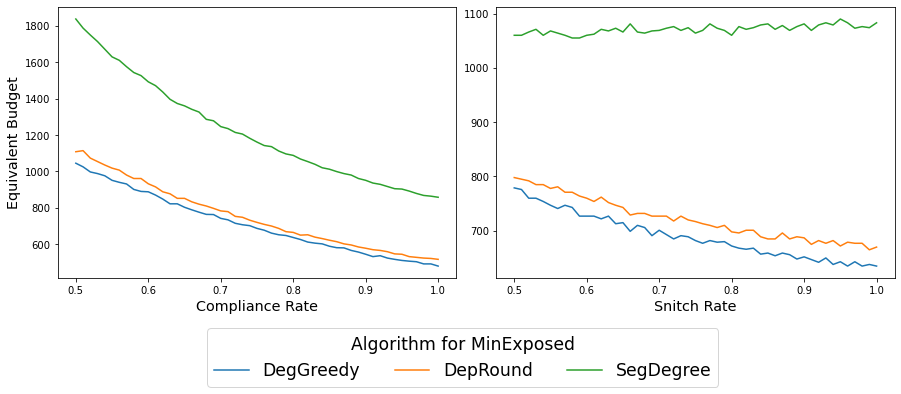

In [23]:
df_mont_comp = pd.read_csv(PROJECT_ROOT / "output" / "run_AanqD" / "results.csv")
df_mont_comp["var"] = "mont_comp"
df_mont_snitch = pd.read_csv(PROJECT_ROOT / "output" / "run_XoD4C" / "results.csv")
df_mont_snitch["var"] = "mont_snitch"

df = pd.concat([df_mont_comp, df_mont_snitch])
df = pd.concat([df[df["agent"] == "DegGreedy_fair"],df[df["agent"] == "DepRound_fair"],df[df["agent"] == "segmented_greedy"]])

df_mont_comp = df[df["var"] == "mont_comp"]
df_mont_snitch = df[df["var"]=="mont_snitch"]

fig, ax = plt.subplots(1,2,figsize=(15,5))

import seaborn as sns

ax0 = sns.lineplot(data = df_mont_comp, x = "compliance_rate", y = "equivalent_budget", hue = "agent", ax = ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Compliance Rate", fontsize = 'x-large')
ax[0].set_ylabel("Equivalent Budget", fontsize = 'x-large')

ax1 = sns.lineplot(data = df_mont_snitch, x = "snitch_rate", y = "equivalent_budget", hue = "agent", ax = ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Snitch Rate", fontsize = 'x-large')
ax[1].set_ylabel("")
plt.subplots_adjust(wspace = 0.1)

legend = fig.legend(['DegGreedy', 'DepRound', 'SegDegree'], title='Algorithm for MinExposed', loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.2), fontsize = 'xx-large')
plt.setp(legend.get_title(), fontsize = "xx-large")

fig.savefig("../output/plots/mont_tradeoff.png", dpi=500, bbox_inches = 'tight')

## Fairness

In [42]:
df_o = pd.read_csv(PROJECT_ROOT / "output" / "run_D6JeL" / "results.csv")
df_o = pd.concat([df_o, pd.read_csv(PROJECT_ROOT / "output" / "run_Yg2WP" / "results.csv")])

print("MONTGOMERY\n")

df = df_o

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df = df[df["budget"]==750]

df_none = df[df["policy"]=="none"]
df_equal = df[df["policy"]=="equal"]
df_old = df[df["policy"]=="old"]
df_young = df[df["policy"]=="young"]
df_adult = df[df["policy"]=="adult"]

for alg in ["DegGreedy_fair", "DepRound_fair"]:
    print("\t" + str(alg))
    print("\t Avg \t Std")
    print("NONE:\t" + str(round(df_none[df_none["agent"]==alg]["infected"].mean(),2)) + "\t" + str(round(df_none[df_none["agent"]==alg]["infected"].std(), 2)))
    print("EQUAL:\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].std(),2)))
    print("OLD:\t" + str(round(df_old[df_old["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_old[df_old["agent"]==alg]["infected"].std(), 2)))
    print("ADULT:\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].std(),2)))

MONTGOMERY

	DegGreedy_fair
	 Avg 	 Std
NONE:	44.72	0.41
EQUAL:	44.81	0.41
OLD:	44.94	0.43
ADULT:	44.85	0.41
	DepRound_fair
	 Avg 	 Std
NONE:	45.31	0.44
EQUAL:	45.45	0.4
OLD:	45.58	0.36
ADULT:	45.47	0.34


In [38]:
df_o = pd.read_csv(PROJECT_ROOT / "output" / "run_DzxnZ" / "results.csv")

print("ALBEMARLE\n")

df = df_o[(df_o["budget"]==1350)]

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df_none = df[df["policy"]=="none"]
df_equal = df[df["policy"]=="equal"]
df_old = df[df["policy"]=="old"]
df_young = df[df["policy"]=="young"]
df_adult = df[df["policy"]=="adult"]

for alg in ["DegGreedy_fair", "DepRound_fair"]:
    print("\t" + str(alg))
    print("\t Avg \t Std")
    print("NONE:\t" + str(round(df_none[df_none["agent"]==alg]["infected"].mean(),2)) + "\t" + str(round(df_none[df_none["agent"]==alg]["infected"].std(), 2)))
    print("EQUAL:\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].std(),2)))
    print("OLD:\t" + str(round(df_old[df_old["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_old[df_old["agent"]==alg]["infected"].std(), 2)))
    print("ADULT:\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].std(),2)))

ALBEMARLE

	DegGreedy_fair
	 Avg 	 Std
NONE:	51.69	0.21
EQUAL:	51.66	0.2
OLD:	51.72	0.18
ADULT:	51.71	0.18
	DepRound_fair
	 Avg 	 Std
NONE:	51.42	0.17
EQUAL:	51.5	0.21
OLD:	51.59	0.17
ADULT:	51.51	0.13


In [39]:
df_o = pd.read_csv(PROJECT_ROOT / "output" / "run_VYSLL" / "results.csv")

print("MONTGOMERY*\n")

df = df_o[(df_o["budget"]==750)]

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df_none = df[df["policy"]=="none"]
df_equal = df[df["policy"]=="equal"]
df_old = df[df["policy"]=="old"]
df_young = df[df["policy"]=="young"]
df_adult = df[df["policy"]=="adult"]

for alg in ["DegGreedy_fair", "DepRound_fair"]:
    print("\t" + str(alg))
    print("\t Avg \t Std")
    print("NONE:\t" + str(round(df_none[df_none["agent"]==alg]["infected"].mean(),2)) + "\t" + str(round(df_none[df_none["agent"]==alg]["infected"].std(), 2)))
    print("EQUAL:\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].std(),2)))
    print("OLD:\t" + str(round(df_old[df_old["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_old[df_old["agent"]==alg]["infected"].std(), 2)))
    print("ADULT:\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].std(),2)))

MONTGOMERY*

	DegGreedy_fair
	 Avg 	 Std
NONE:	57.45	0.22
EQUAL:	57.54	0.23
OLD:	57.54	0.2
ADULT:	57.5	0.19
	DepRound_fair
	 Avg 	 Std
NONE:	57.77	0.23
EQUAL:	57.82	0.22
OLD:	57.84	0.21
ADULT:	57.85	0.23


In [40]:
df_o = pd.read_csv(PROJECT_ROOT / "output" / "run_4nW5o" / "results.csv")

print("ALBEMARLE*\n")

df = df_o[(df_o["budget"]==1350)]

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

df_none = df[df["policy"]=="none"]
df_equal = df[df["policy"]=="equal"]
df_old = df[df["policy"]=="old"]
df_young = df[df["policy"]=="young"]
df_adult = df[df["policy"]=="adult"]

for alg in ["DegGreedy_fair", "DepRound_fair"]:
    print("\t" + str(alg))
    print("\t Avg \t Std")
    print("NONE:\t" + str(round(df_none[df_none["agent"]==alg]["infected"].mean(),2)) + "\t" + str(round(df_none[df_none["agent"]==alg]["infected"].std(), 2)))
    print("EQUAL:\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_equal[df_equal["agent"]==alg]["infected"].std(),2)))
    print("OLD:\t" + str(round(df_old[df_old["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_old[df_old["agent"]==alg]["infected"].std(), 2)))
    print("ADULT:\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].mean(), 2)) + "\t" + str(round(df_adult[df_adult["agent"]==alg]["infected"].std(),2)))

ALBEMARLE*

	DegGreedy_fair
	 Avg 	 Std
NONE:	64.61	0.17
EQUAL:	64.66	0.19
OLD:	64.7	0.17
ADULT:	64.65	0.18
	DepRound_fair
	 Avg 	 Std
NONE:	64.65	0.15
EQUAL:	64.74	0.15
OLD:	64.83	0.14
ADULT:	64.77	0.15


## Realistic Model

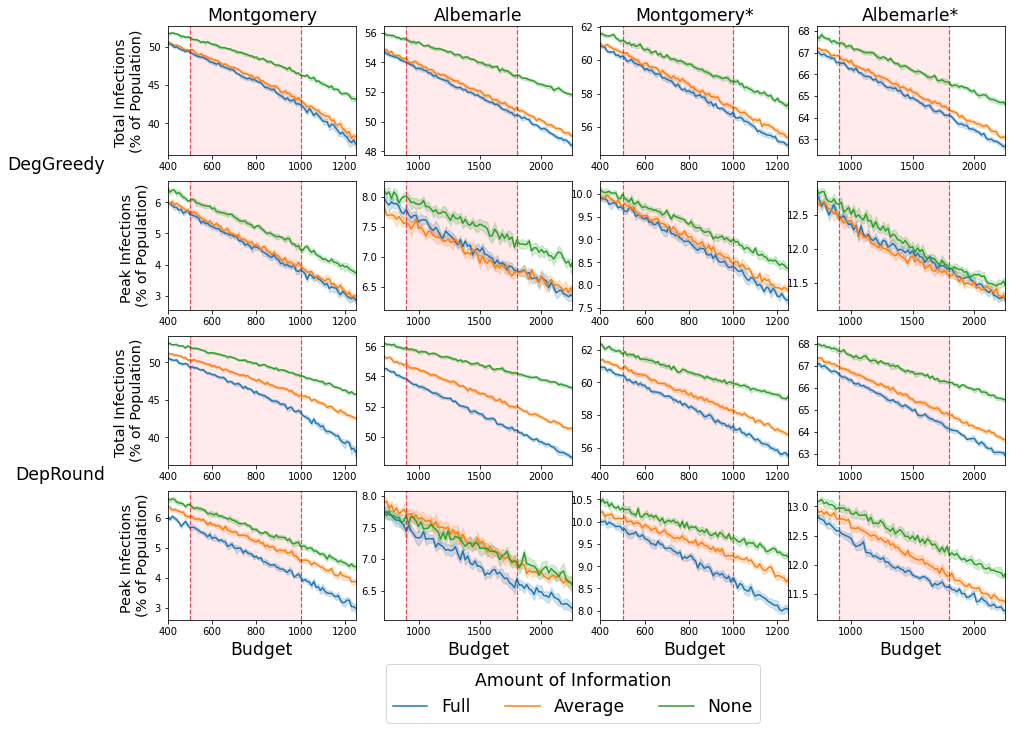

In [44]:
df_m = pd.read_csv(PROJECT_ROOT / "output" / "run_XK2Wx" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_m = pd.read_csv(PROJECT_ROOT / "output" / "run_kDUWp" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_c = pd.read_csv(PROJECT_ROOT / "output" / "run_HHUqV" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_c = pd.read_csv(PROJECT_ROOT / "output" / "run_BxjJA" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df_m_e = pd.read_csv(PROJECT_ROOT / "output" / "run_Txksw" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_m_e = pd.read_csv(PROJECT_ROOT / "output" / "run_7bLKB" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})
df_c_e = pd.read_csv(PROJECT_ROOT / "output" / "run_X9z7Y" / "results.csv").replace({"DepRound_fair":"DepRound Full",
          "DegGreedy_fair":"DegGreedy Full"})
df_avg_c_e = pd.read_csv(PROJECT_ROOT / "output" / "run_k23WZ" / "results.csv").replace({"DepRound_fair":"DepRound Average",
          "DegGreedy_fair":"DegGreedy Average", "DepRound_simplified":"DepRound Impoverished", "Degree":"DegGreedy Impoverished"})

df = pd.concat([df_m_e, df_m, df_avg_m_e, df_avg_m, df_c_e,df_c, df_avg_c_e, df_avg_c])
df = df[(df["agent"]!="Random") & (df["agent"]!="EC")]

df = df.rename(columns={"agent":"Alg for MinExposed"})

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak_count"] = df["infection_list"].apply(lambda x: max(x))

def size(name: str):
    if name[0] == "c": return 131219
    else: return 75457

df["infected"] = df.apply(lambda x: 100.0*x["infection_count"]/size(x["G"]), axis = 1)
df["peak"] = df.apply(lambda x: 100.0*x["peak_count"]/size(x["G"]), axis = 1)

def determine(x):
    if x == "DegGreedy Full" or x=="DepRound Full": return "Full Knowledge"
    elif x == "DegGreedy Average" or x=="DepRound Average": return "Average"
    elif x == "DegGreedy Impoverished" or x=="DepRound Impoverished": return "Impoverished"

df["Information Loss"] = df["Alg for MinExposed"].apply(lambda x: determine(x))
df = pd.concat([df[df["Information Loss"] == "Full Knowledge"], df[df["Information Loss"] == "Average"], df[df["Information Loss"] == "Impoverished"]])

df_deg_m_e = df[(df["G"] == "montgomery_extra") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_m_e = df[(df["G"] == "montgomery_extra") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_c_e =  df[(df["G"] == "cville_extra") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_c_e = df[(df["G"] == "cville_extra") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_m = df[(df["G"] == "montgomery") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]
df_deg_c =  df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DegGreedy Full")|(df["Alg for MinExposed"] == "DegGreedy Average")|(df["Alg for MinExposed"] == "DegGreedy Impoverished"))]
df_dep_c = df[(df["G"] == "cville") & ((df["Alg for MinExposed"] == "DepRound Full")|(df["Alg for MinExposed"] == "DepRound Average")|(df["Alg for MinExposed"] == "DepRound Impoverished"))]

fig, ax = plt.subplots(4,4,figsize=(10,5))

import seaborn as sns

ax0 = sns.lineplot(data=df_deg_m, x="budget", y="infected", hue="Information Loss", ax=ax[0, 0])
ax0.get_legend().remove()
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Total Infections \n(% of Population)",fontsize='x-large')
ax[0, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_dep_m, x="budget", y="infected", hue="Information Loss", ax=ax[2, 0])
ax1.get_legend().remove()
ax[2, 0].set_xlabel("")
ax[2, 0].set_ylabel("Total Infections \n(% of Population)",fontsize='x-large')
ax[2, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 0].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[2, 0].set_xlim(400,1250)


ax2 = sns.lineplot(data=df_deg_c, x="budget", y="infected", hue="Information Loss", ax=ax[0, 1])
ax2.get_legend().remove()
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")
ax[0, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 1].set_xlim(720,2250)


ax3 = sns.lineplot(data=df_dep_c, x="budget", y="infected", hue="Information Loss", ax=ax[2, 1])
ax3.get_legend().remove()
ax[2, 1].set_xlabel("")
ax[2, 1].set_ylabel("")
ax[2, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[2, 1].set_xlim(720,2250)

ax4 = sns.lineplot(data=df_deg_m_e, x="budget", y="infected", hue="Information Loss", ax=ax[0, 2])
ax4.get_legend().remove()
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("")
ax[0, 2].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 2].axvspan(500, 1000, alpha=0.08, color='red')
ax[0, 2].set_xlim(400,1250)

ax5 = sns.lineplot(data=df_dep_m_e, x="budget", y="infected", hue="Information Loss", ax=ax[2, 2])
ax5.get_legend().remove()
ax[2, 2].set_xlabel("")
ax[2, 2].set_ylabel("")
ax[2, 2].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 2].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 2].axvspan(500, 1000, alpha=0.08, color='red')
ax[2, 2].set_xlim(400,1250)

ax6 = sns.lineplot(data=df_deg_c_e, x="budget", y="infected", hue="Information Loss", ax=ax[0, 3])
ax6.get_legend().remove()
ax[0, 3].set_xlabel("")
ax[0, 3].set_ylabel("")
ax[0, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[0, 3].set_xlim(720,2250)

ax7 = sns.lineplot(data=df_dep_c_e, x="budget", y="infected", hue="Information Loss", ax=ax[2, 3])
ax7.get_legend().remove()
ax[2, 3].set_xlabel("")
ax[2, 3].set_ylabel("")
ax[2, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 3].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[2, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[2, 3].set_xlim(720,2250)

#------------------------- PEAKS ---------------------#

ax0 = sns.lineplot(data=df_deg_m, x="budget", y="peak", hue="Information Loss", ax=ax[1, 0])
ax0.get_legend().remove()
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("Peak Infections \n(% of Population)", fontsize='x-large')
ax[1, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 0].set_xlim(400,1250)

ax1 = sns.lineplot(data=df_dep_m, x="budget", y="peak", hue="Information Loss", ax=ax[3, 0])
ax1.get_legend().remove()
ax[3, 0].set_xlabel("Budget", fontsize='xx-large')
ax[3, 0].set_ylabel("Peak Infections \n(% of Population)", fontsize='x-large')
ax[3, 0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 0].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 0].axvspan(500, 1000, alpha=0.08, color='red')
ax[3, 0].set_xlim(400,1250)

ax2 = sns.lineplot(data=df_deg_c, x="budget", y="peak", hue="Information Loss", ax=ax[1, 1])
ax2.get_legend().remove()
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("")
ax[1, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 1].set_xlim(720,2250)

ax3 = sns.lineplot(data=df_dep_c, x="budget", y="peak", hue="Information Loss", ax=ax[3, 1])
ax3.get_legend().remove()
ax[3, 1].set_xlabel("Budget", fontsize='xx-large')
ax[3, 1].set_ylabel("")
ax[3, 1].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 1].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 1].axvspan(900, 1800, alpha=0.08, color='red')
ax[3, 1].set_xlim(720,2250)

ax4 = sns.lineplot(data=df_deg_m_e, x="budget", y="peak", hue="Information Loss", ax=ax[1, 2])
ax4.get_legend().remove()
ax[1, 2].set_xlabel("")
ax[1, 2].set_ylabel("")
ax[1, 2].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 2].axvspan(500, 1000, alpha=0.08, color='red')
ax[1, 2].set_xlim(400,1250)

ax5 = sns.lineplot(data=df_dep_m_e, x="budget", y="peak", hue="Information Loss", ax=ax[3, 2])
ax5.get_legend().remove()
ax[3, 2].set_xlabel("Budget", fontsize='xx-large')
ax[3, 2].set_ylabel("")
ax[3, 2].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 2].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 2].axvspan(500, 1000, alpha=0.08, color='red')
ax[3, 2].set_xlim(400,1250)

ax6 = sns.lineplot(data=df_deg_c_e, x="budget", y="peak", hue="Information Loss", ax=ax[1, 3])
ax6.get_legend().remove()
ax[1, 3].set_xlabel("")
ax[1, 3].set_ylabel("")
ax[1, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvline(x=1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[1, 3].set_xlim(720,2250)

ax7 = sns.lineplot(data=df_dep_c_e, x="budget", y="peak", hue="Information Loss", ax=ax[3, 3])
ax7.get_legend().remove()
ax[3, 3].set_xlabel("Budget", fontsize='xx-large')
ax[3, 3].set_ylabel("")
ax[3, 3].axvline(x=900, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 3].axvline(x= 1800, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[3, 3].axvspan(900, 1800, alpha=0.08, color='red')
ax[3, 3].set_xlim(720,2250)

pad = 5 # in points

ax[0, 0].annotate("Montgomery", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline',fontsize='xx-large')
ax[0, 1].annotate("Albemarle", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline',fontsize='xx-large')
ax[0, 2].annotate("Montgomery*", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline',fontsize='xx-large')
ax[0, 3].annotate("Albemarle*", xy=(0.5, 1), xytext=(0, pad), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline',fontsize='xx-large')

ax[0, 0].annotate("DegGreedy", xy=(0, -0.1), xytext=(-ax[0, 0].yaxis.labelpad - pad, 0), xycoords= ax[0, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center',fontsize='xx-large')
ax[2, 0].annotate("DepRound", xy=(0, -0.1), xytext=(-ax[2, 0].yaxis.labelpad - pad, 0), xycoords= ax[2, 0].yaxis.label, textcoords='offset points', size='large', ha='right', va='center',fontsize='xx-large')

plt.subplots_adjust(wspace = 0.15, hspace = 0.2)
fig.subplots_adjust(top=0.95)

legend = fig.legend(["Full", "Average", "None"], title = "Amount of Information", loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.03),  fontsize = "xx-large")
plt.setp(legend.get_title(), fontsize='xx-large')
fig.set_figwidth(15)
fig.set_figheight(10)
fig.savefig('../output/plots/combined_realistic_model.png', dpi=500, bbox_inches = 'tight')

plt.show()

In [7]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "mont.json", 'r') as infile:
        j = json.load(infile)
        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]

G = load_graph_montgomery_labels()
G = read_extra_edges(G, 0.15)
state = InfectionState(G, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 0.8)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(DepRound_fair(state))
    print(len(state.SIR.R))

341
610
1177
1989
3272
5342
8586
13335
19330
25937
32113
36850
39972
41682
42647
43111
43323
43403
43422
43435
43437
43438


In [43]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "albe.json", 'r') as infile:
        j = json.load(infile)
        (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
        infections = j["infections"]

G = load_graph_cville_labels()
state = InfectionState(G, (S, I1, I2, R), 1350, "none", 0.05, True, 0.8, True, 0.8)
while len(state.SIR.I1) + len(state.SIR.I2):
    state.step(DepRound_fair(state))
    print(len(state.SIR.R))

199
516
1441
3091
5646
9483
15450
23786
32993
42109
50185
56536
61073
64012
65792
66812
67329
67579
67707
67759
67773
67777
67779
